In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from astropy import units as u
import setigen as stg

bshuf filter already loaded, skip it.


blimpy plotting config.py setup_plotting_backend: DISPLAY is *empty*
blimpy plotting config.py (import config.py definitions): matplotlib backend is module://matplotlib_inline.backend_inline


In [2]:
%matplotlib inline

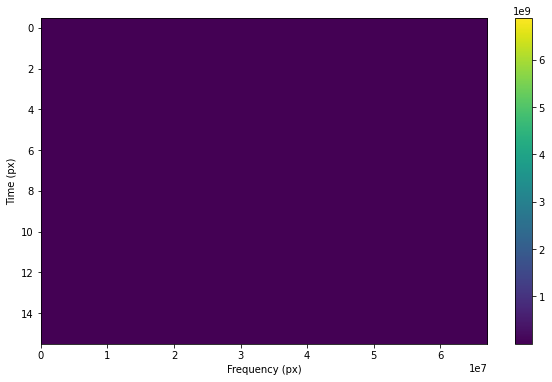

In [9]:
import blimpy as bl
obs = bl.Waterfall('/datax/scratch/calebp/HIP70497/lband/blc45_guppi_60095_70975_HIP70497_0100.rawspec.0000.h5')
frame = stg.Frame(waterfall=obs)
# frame = stg.Frame(waterfall=obs,
#                   fchans=1000,
#                   tchans=16*u.pixel,
#                   df=2.7939677238464355*u.Hz,
#                   dt=18.253611008*u.s,
#                   fch1=1174.5518*u.MHz)
fig = plt.figure(figsize=(10, 6))

frame.plot()

plt.show()

[autoreload of h5py._hl.files failed: Traceback (most recent call last):
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl/lib/python3.10/site-packages/h5py/_hl/files.py", line 27, in <module>
    direct_vfd = h5.get_config().direct_vfd
AttributeError: 'h5py.h5.H5PYConfig' object has no attribu

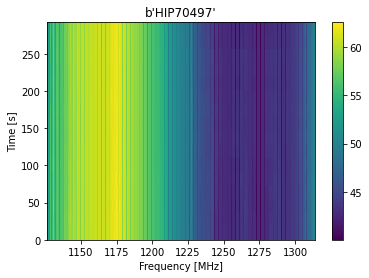

In [19]:
frame.bl_plot()

blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/bbrzycki/data/test_injection.h5 without blobbing.


HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 0:
  #000: H5Pocpl.c line 965 in H5Pget_filter_by_id2(): can't find object for ID
    major: Object atom
    minor: Unable to find atom information (already closed?)
  #001: H5Pint.c line 3990 in H5P_object_verify(): property list is not a member of the class
    major: Property lists
    minor: Unable to register new atom
  #002: H5Pint.c line 3941 in H5P_isa_class(): not a property list
    major: Invalid arguments to routine
    minor: Inappropriate type


ValueError: Unable to create dataset (error during user callback)

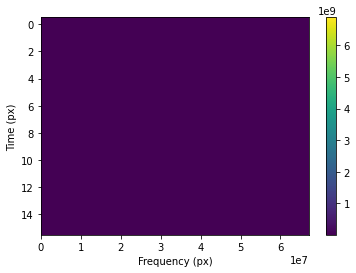

In [18]:
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=800),
                                            drift_rate=0*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.plot()
frame.save_h5('/datax/scratch/bbrzycki/data/test_injection.h5')

In [4]:
saved_frame = stg.Frame('test.h5')
signal = saved_frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=800),
                                            drift_rate=0*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

saved_frame.plot()
saved_frame.save_h5('test_injection.h5')


*** Oops, hdf_reader: examine_h5: HDF5 data matrix missing ***



SystemExit: 86

/datax/scratch/bbrzycki/miniconda3/envs/bl/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


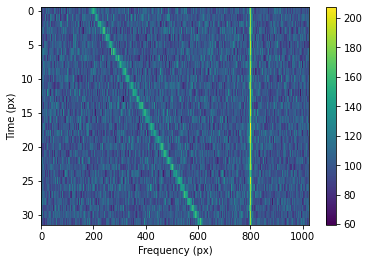

In [5]:
saved_injection_frame = stg.Frame('test_injection.h5')
saved_injection_frame.plot()